load .pkl dataframe from healthgrades and clean up

In [26]:
#import all required packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import pickle
import seaborn as sns



In [27]:
#import dataset 
df = pd.read_pickle('Healthgradesdoctorlist.pkl')

#inspect columns in df
for columnname in df:
    print(columnname)
 

aboutMe
acceptsNewPatients
address.line1
address.line2
addresses
affiliatedHospitalIDs
age
availability.hasAny
availability.nextDayAppointments
availability.sameDayAppointments
carePhilosophy.fullText
carePhilosophy.isShortened
carePhilosophy.text
displayLastName
displayName
displayOffice.address
displayOffice.cd
displayOffice.city
displayOffice.displayOfficeCityState
displayOffice.distanceInMiles
displayOffice.id
displayOffice.isPrimaryOffice
displayOffice.lat
displayOffice.lng
displayOffice.name
displayOffice.officeName
displayOffice.phoneNumbers
displayOffice.rank
displayOffice.state
displayOffice.type
displayOffice.url
displayOffice.zip
distance
enhancedMessage.message
enhancedMessage.phoneNumber
enhancedMessage.selectedFacility
enhancedMessage.selectedName
enhancedMessage.selectedSponsor
gender
hasNextDayAppointment
hasOasInventoryInTimeframe
hasSpecialtyExcellenceHospital
hasStaticAvailability
hasTopHospital
hasTreatmentExcellenceHospital
imagePaths
images
isOar
isOas
isPremium
i

In [28]:
# collect columns that do not seem useful. This was a first pass. 
# If I had to do it again I would verify for each category whether it was useful or not. 
droplist = ['acceptsNewPatients','addresses','isPremium','images','displayLastName','specialty','imagePaths','distance','providerUrl','suppressSurveys','pwid','isOar','isOas']
for columnname in df:
    if 'availability' in columnname:
        droplist.append(columnname)
    
    if 'displayOffice' in columnname:
        droplist.append(columnname)
    
    if 'sponsor' in columnname:
        droplist.append(columnname)
            
    if 'enhancedMessage' in columnname:
        droplist.append(columnname)
        
    if 'carePhilosophy' in columnname:
        droplist.append(columnname)
        
    if 'has' in columnname:
        droplist.append(columnname)


In [29]:
# drop columns that do not seem useful
df = df.drop(columns = droplist)

#make display name the index
df = df.set_index('displayName')
df.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation
displayName,,,,,,,,,,,,,,,,
"Dr. Sylvia Adams, MD","Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23
"Dr. Morton Coleman, MD","Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55
"Dr. Karen Haglof, MD","Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19
"Dr. Michael Grossbard, MD",Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32
"Dr. Jeffrey Tepler, MD","Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36


In [5]:
#drop any doctors that do not have a degree
dropdoc = []
for doctor in df.index:
    if len((doctor.split()))<3:
        dropdoc.append(doctor)
print(dropdoc)
df = df.drop(dropdoc)

['Qinghu Ren', 'Ciara Kelly', 'Louise Connell', 'Gordon Magill', 'Emmet Jordan', 'Robert Lim']


Extract full names and make it the index compare to full names of "best doctors" and add a best doctor column

In [6]:
#extract full names and add to dataframe
namelist = []
for name in df.index:
    w = name.split()
    if 'Dr.' in w: w.remove('Dr.')
    namelist.append(w[0]+' '+ w[1][:-1])
    
df['fullname'] = namelist
#add a column for is best doctor, set to 0 for all for now
df['isbest'] = False
#check to see if it makes sense
df = df.set_index('fullname')
df.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest
fullname,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23,False
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55,False
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19,False
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32,False
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36,False


In [7]:
#remove any duplicate doctor names

df = df[~df.index.duplicated(keep='first')]


Import list of best doctors from NYmag 2018, extract best doctors, and if best doctor add to the column

In [8]:
#list of good doctors from castle connolly page
page = requests.get("http://www.castleconnolly.com/doctors/results.cfm?source=nymetro&speccode=041")

pagecontent = page.content
soup = BeautifulSoup(pagecontent,'html.parser')
#doctor names
best_doctors = soup.find_all('b')

In [9]:
#visualize to see what data looks like
best_doctors[0:5]

[<b>Dr. Minaxi P. Jhawer (Medical Oncology)</b>,
 <b>Dr. Jill Morrison (Medical Oncology)</b>,
 <b>Dr. Dan Costin (Medical Oncology)</b>,
 <b>Dr. Bhoomi Mehrotra (Medical Oncology)</b>,
 <b>Dr. Joseph A. Sparano (Medical Oncology)</b>]

In [10]:
best_doctor_names = [];
for doctorname in best_doctors:
    name_temp = str(doctorname)[7:-23];
    n = name_temp.split()
    fullname = n[0]+' '+n[-1]
    best_doctor_names.append(fullname)
best_doctor_names[0:5]

['Minaxi Jhawer',
 'Jill Morrison',
 'Dan Costin',
 'Bhoomi Mehrotra',
 'Joseph Sparano']

In [11]:
#temporarily add 9 more names manually
#Castle Connoly charges for this information and does not allow an API
best_doctor_names.append('Anna Pavlick')
best_doctor_names.append('Julia Smith')
best_doctor_names.append('Peter Kozuch')
best_doctor_names.append('Paula Klien')
best_doctor_names.append('Julie Gold')
best_doctor_names.append('Barry Boyd')
best_doctor_names.append('Jeffrey Schneider')
best_doctor_names.append('Robert Maki')
best_doctor_names.append('Andre Goy')


In [12]:
# add good/best doctors to the 'isbest' column to make a good "Y" for the model
isgoodlist = []
for doctor in df.index:
    for name in best_doctor_names:
        if name == doctor:
            df.loc[doctor,'isbest'] = True


In [13]:
#see how many of the NYmag doctors are on healthgrades as the best
df.isbest.value_counts()

False    369
True      20
Name: isbest, dtype: int64

In [14]:
#convert years since graduation to int or double
df.yearsSinceGraduation = df['yearsSinceGraduation'].astype(float)
df.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest
fullname,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False


In [15]:
#Add number of publications as a feature
with open('pubmeddict.pkl', 'rb') as f:
    pub_dict = pickle.load(f)

In [16]:
#calculate number of publications per doctor and add as a column
lengthofpub = {}
for name in df.index:
    lengthofpub[name] = len(pub_dict[name])
    
df_temp1 = pd.DataFrame.from_dict(lengthofpub,orient = 'index')
df_temp1.columns = ['Number_pub']
df = pd.concat([df,df_temp1], axis=1)


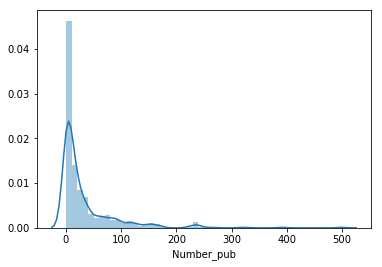

In [18]:
#check the distribution of number of publications. What percent of doctors have no publications?
sns.distplot(df.Number_pub)


In [24]:
#Percent of NYC doctors who have 0 publications
sum(df.Number_pub==0)*100/len(df)

14.138817480719794

A tree based algorithm is likely to work better with 15% of doctors having 0 publications. Yet this number is not so high that I feel uncomfortable about using logistic regression.

In [32]:
#save as a pickle file, clean data
df.to_pickle('HealthgradesNymagClean.pkl')